In [ ]:
import os
import pandas as pd
import geopandas as gpd
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
india_states = gpd.read_file('india_state_geo.json')


print("Matches:", matches.shape)
print("Deliveries:", deliveries.shape)
print("States GeoDataFrame:", india_states.shape)
matches.info()
deliveries.info()
india_states.info()

Matches: (1095, 20)
Deliveries: (260920, 17)
States GeoDataFrame: (35, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null 

In [ ]:
import pandas as pd


df = deliveries.merge(
    matches,
    left_on='match_id',
    right_on='id',
    how='inner',
    suffixes=('_delivery', '_match')
)


print("Merged DataFrame shape:", df.shape)
df.head()


Merged DataFrame shape: (260920, 37)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


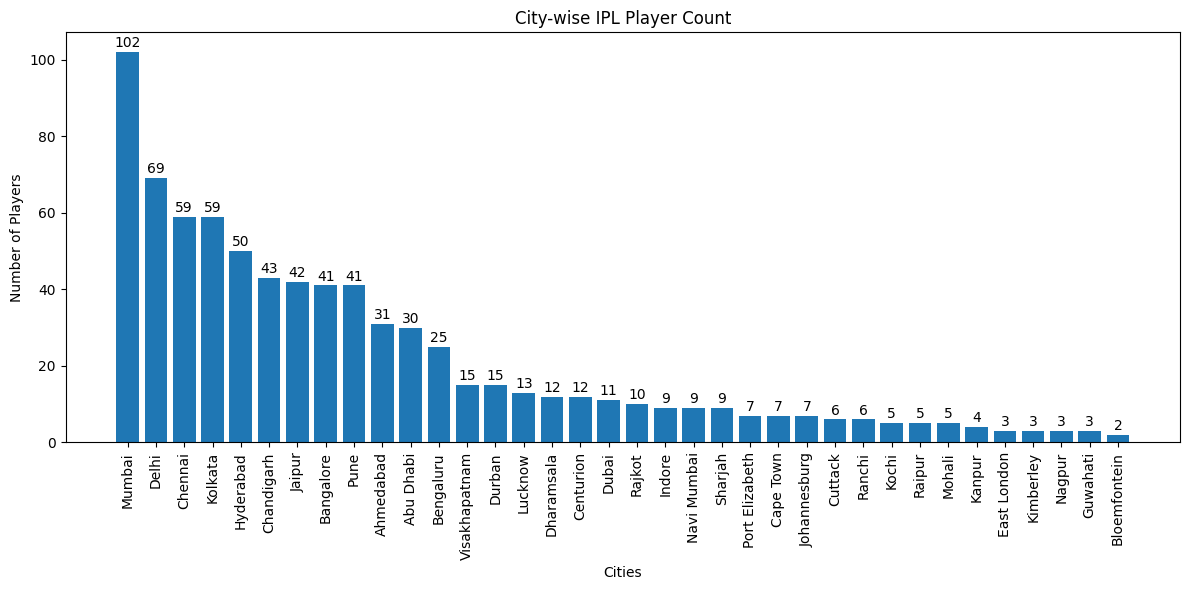

In [ ]:
import matplotlib.pyplot as plt
player_state_df = df[['player_of_match', 'city']].copy()
player_state_df.columns = ['player_name', 'state']
player_state_df = player_state_df.drop_duplicates()

state_player_counts = player_state_df['state'].value_counts().reset_index()
state_player_counts.columns = ['state', 'player_count']

# 3. Create the bar plot
plt.figure(figsize=(12, 6))
bars=plt.bar(state_player_counts['state'], state_player_counts['player_count'])
plt.xlabel("Cities")
plt.ylabel("Number of Players")
plt.title("City-wise IPL Player Count")
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
    import plotly.express as px
    import pandas as pd
    venue_matches = matches.groupby('venue').size().reset_index(name='matches_played')
    first_innings_scores = matches[matches['target_runs'].notna()]
    print('target_runs' in matches.columns)  # Should print True
    print(matches['target_runs'].head())  # Should show some values
    print(matches['venue'].value_counts())
    print("Venue match counts:\n", venue_matches)

    if first_innings_scores.empty:
        print("No target runs data found for venue analysis")

    venue_avg_score = first_innings_scores.groupby('venue').agg(
        avg_score=('target_runs', 'mean'),
        max_score=('target_runs', 'max'),
        min_score=('target_runs', 'min')
    ).reset_index()

    venue_stats = pd.merge(venue_avg_score, venue_matches, on='venue')

    print("\nVenue average scores:\n", venue_avg_score) # Now venue_avg_score has a value
    print("\nVenue stats before filtering:\n", venue_stats)  # venue_stats is calculated after venue_avg_score

    min_matches = 5
    venue_stats = venue_stats[venue_stats['matches_played'] >= min_matches]

    high_scoring_matches = first_innings_scores[first_innings_scores['target_runs'] > 180]
    high_scoring_venues = high_scoring_matches.groupby('venue').size().reset_index(name='high_scoring_matches')

    venue_stats = pd.merge(venue_stats, high_scoring_venues, on='venue', how='left')
    venue_stats['high_scoring_matches'].fillna(0, inplace=True)
    venue_stats['high_scoring_pct'] = (venue_stats['high_scoring_matches'] / venue_stats['matches_played']) * 100
    venue_stats.head()

    fig = px.treemap(
    venue_stats,
    path=['venue'],  # Hierarchy: venue
    values='matches_played',  # Size of tiles based on matches played
    color='avg_score',  # Color based on average score
    hover_data=['matches_played', 'avg_score', 'max_score', 'min_score'],  # Data to show on hover
    color_continuous_scale='RdBu',  # Color scale (Red-Blue)
    title="IPL Venue Statistics: Matches Played and Average Scores"
    )


    fig.data[0].texttemplate = "%{label}<br>Matches Played: %{value}<br>Avg. Score: %{customdata[0]:.2f}<br>Max Score: %{customdata[1]:.2f}<br>Min Score: %{customdata[2]:.2f}<br>High Scoring Pct: %{customdata[3]:.2f}<br>%"
    fig.update_traces(customdata=venue_stats[['avg_score', 'max_score', 'min_score', 'high_scoring_pct']])

    fig.update_layout(
        margin=dict(t=50, l=25, r=25, b=25)  # Adjust margins for better visibility
    )

    fig.show()

True
0    223.0
1    241.0
2    130.0
3    166.0
4    111.0
Name: target_runs, dtype: float64
venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                         

<ipython-input-7-2e0ec430df85>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  venue_stats['high_scoring_matches'].fillna(0, inplace=True)


In [ ]:
# Geospatial Plot of IPL Matches Hosted by Stadium

import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

venue_counts = (
    df.drop_duplicates('match_id')['venue']
    .value_counts()
    .reset_index()
)
venue_counts.columns = ['venue', 'match_count']


geolocator = Nominatim(user_agent="ipl_geo")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_coords(name):
    loc = geocode(f"{name}, India")
    return (loc.latitude, loc.longitude) if loc else (None, None)

venue_counts[['lat', 'lon']] = venue_counts['venue'] \
    .apply(lambda x: pd.Series(get_coords(x)))


india_map = folium.Map(location=[22.9734, 78.6569], zoom_start=5)


for _, row in venue_counts.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=3 + row['match_count'] * 0.1,  # scale marker radius by match count
            color='crimson',
            fill=True,
            fill_opacity=0.6,
            popup=f"{row['venue']}<br>Matches: {row['match_count']}"
        ).add_to(india_map)


india_map


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

In [ ]:
import pandas as pd
import geopandas as gpd


df = df.copy()

# 1. Drop super‑over matches
df = df[df['super_over'] == 'N']

# 2. Exclude matches with no result
df = df[df['result'] != 'no result']

# 3. Fill missing values
df['city'] = df['city'].fillna('Unknown')
df['player_of_match'] = df['player_of_match'].fillna('Not Awarded')
df['umpire2'] = df['umpire2'].fillna('Unknown')

# 4. Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# 5. Feature engineering—cumulative runs & wickets per inning
# Use 'total_runs' if present, otherwise sum batsman + extra runs
if 'total_runs' in df.columns:
    df['runs'] = df['total_runs']
else:
    df['runs'] = df['batsman_runs'] + df.get('extra_runs', 0)

df['cum_runs'] = df.groupby(['match_id', 'inning'])['runs'].cumsum()

# Flag wicket deliveries (drop 'dismissal_kind' if present)
wicket_col = 'player_dismissed' if 'player_dismissed' in df.columns else None
if wicket_col:
    df['is_wicket'] = df[wicket_col].notnull().astype(int)
else:
    # fallback: consider any delivery with zero runs and no extra? (not ideal)
    df['is_wicket'] = 0

df['cum_wickets'] = df.groupby(['match_id', 'inning'])['is_wicket'].cumsum()

# 6. Final score per match‑inning
final_scores = (df
                .groupby(['match_id', 'inning'])['cum_runs']
                .max()
                .reset_index()
                .rename(columns={'cum_runs': 'final_score'}))
df = df.merge(final_scores, on=['match_id', 'inning'], how='left')

# 7. One‑hot encode key categorical fields
to_encode = ['venue', 'city', 'toss_winner', 'toss_decision',
             'batting_team', 'bowling_team', 'winner']
df = pd.get_dummies(df, columns=[c for c in to_encode if c in df.columns], drop_first=True)

# 8. Drop redundant columns
drops = ['id', 'is_super_over', 'method', 'umpire1', wicket_col]
df = df.drop([col for col in drops if col and col in df.columns], axis=1)

# 9. Reset index
df.reset_index(drop=True, inplace=True)

print("Preprocessed DataFrame shape:", df.shape)
df.head()


Preprocessed DataFrame shape: (256796, 196)


,match_id,inning,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,...,winner_Lucknow Super Giants,winner_Mumbai Indians,winner_Pune Warriors,winner_Punjab Kings,winner_Rajasthan Royals,winner_Rising Pune Supergiant,winner_Rising Pune Supergiants,winner_Royal Challengers Bangalore,winner_Royal Challengers Bengaluru,winner_Sunrisers Hyderabad
0,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,...,False,False,False,False,False,False,False,False,False,False
1,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,335982,1,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,335982,1,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,335982,1,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. Load datasets
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

# 2. Filter valid matches
matches = matches[(matches.super_over=='N') & (matches.result!='no result')].copy()
valid_ids = matches.id
deliveries = deliveries[deliveries.match_id.isin(valid_ids)]

# 3. Compute match-level batting/bowling stats
agg = deliveries.groupby(['match_id','inning']).agg(
    runs=('batsman_runs','sum'),
    balls=('ball','count')
).reset_index()
agg['run_rate'] = agg.runs / (agg.balls/6)
pivot = agg.pivot(index='match_id', columns='inning', values=['runs','run_rate'])
pivot.columns = [f'{stat}_{inn}' for stat, inn in pivot.columns]
stats = pivot.reset_index().rename(columns={
    'runs_1':'team1_runs','runs_2':'team2_runs',
    'run_rate_1':'team1_run_rate','run_rate_2':'team2_run_rate'
})
stats['team1_econ'] = stats.team2_runs / (stats.team2_run_rate)
stats['team2_econ'] = stats.team1_runs / (stats.team1_run_rate)

# 4. Build base DataFrame
md = matches[['id','team1','team2','toss_winner','toss_decision','venue','city','winner']].rename(columns={'id':'match_id'})
md = md.merge(stats, on='match_id', how='left')

# 5. Historical win percentages
win_counts = md.winner.value_counts()
match_counts = pd.concat([md.team1, md.team2]).value_counts()
win_pct = (win_counts/match_counts).fillna(0)
md['team1_win_pct'] = md.team1.map(win_pct)
md['team2_win_pct'] = md.team2.map(win_pct)

# 6. Venue win percentages
venue_wins = md.groupby(['venue','winner']).size().unstack(fill_value=0)
venue_matches = md.groupby('venue').size()
venue_win_pct = venue_wins.div(venue_matches, axis=0).fillna(0)
md['team1_venue_win_pct'] = md.apply(lambda r: venue_win_pct.at[r.venue, r.team1], axis=1)
md['team2_venue_win_pct'] = md.apply(lambda r: venue_win_pct.at[r.venue, r.team2], axis=1)

# 7. Head-to-head percentages
hh_wins = pd.crosstab(md.team1, md.team2, md.winner,
                     aggfunc=lambda x: (x==md.loc[x.index,'team1']).sum()).fillna(0)
hh_matches = pd.crosstab(md.team1, md.team2).fillna(0)
hh_pct = (hh_wins / hh_matches).fillna(0)
md['team1_vs_team2_pct'] = md.apply(lambda r: hh_pct.at[r.team1, r.team2], axis=1)

# 8. Top-player proxy
top_players = md.winner.value_counts().index[:20]
md['team1_top_player'] = md.team1.isin(top_players).astype(int)
md['team2_top_player'] = md.team2.isin(top_players).astype(int)

# 9. Home-ground feature
home_map = {
    'Chennai Super Kings':'Chennai','Delhi Capitals':'Delhi','Delhi Daredevils':'Delhi',
    'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata',
    'Royal Challengers Bangalore':'Bangalore','Royal Challengers Bengaluru':'Bangalore',
    'Rajasthan Royals':'Jaipur','Kings XI Punjab':'Mohali','Punjab Kings':'Mohali',
    'Sunrisers Hyderabad':'Hyderabad','Deccan Chargers':'Hyderabad','Pune Warriors':'Pune',
    'Gujarat Lions':'Rajkot','Rising Pune Supergiant':'Pune','Rising Pune Supergiants':'Pune',
    'Kochi Tuskers Kerala':'Kochi','Gujarat Titans':'Rajkot','Lucknow Super Giants':'Lucknow'
}
md['team1_home'] = (md.team1.map(home_map)==md.city).astype(int)
md['team2_home'] = (md.team2.map(home_map)==md.city).astype(int)

# 10. Bowler-strength feature
bowler_stats = deliveries.groupby(['match_id','bowling_team','bowler']).agg(
    runs_conceded=('total_runs','sum'),
    balls_bowled=('ball','count')
).reset_index()
bowler_stats['econ'] = bowler_stats.runs_conceded / (bowler_stats.balls_bowled/6)
team_bowler = bowler_stats.groupby(['match_id','bowling_team']).apply(
    lambda df: df.nlargest(3,'balls_bowled').econ.mean()
).reset_index(name='bowler_strength')
md = md.merge(
    team_bowler.pivot(index='match_id',columns='bowling_team',values='bowler_strength')
                .rename(columns=lambda c: f'bowler_strength_{c}'),
    left_on='match_id', right_index=True, how='left'
)
md['team1_bowler_str'] = md.apply(lambda r: r[f'bowler_strength_{r.team1}'], axis=1)
md['team2_bowler_str'] = md.apply(lambda r: r[f'bowler_strength_{r.team2}'], axis=1)

# 11. Batsman-form feature
batsman_stats = deliveries.groupby(['match_id','batting_team','batter']).agg(
    runs_scored=('batsman_runs','sum')
).reset_index()
team_batsman = batsman_stats.groupby(['match_id','batting_team']).apply(
    lambda df: df.nlargest(5,'runs_scored').runs_scored.mean()
).reset_index(name='batsman_form')
md = md.merge(
    team_batsman.pivot(index='match_id',columns='batting_team',values='batsman_form')
                 .rename(columns=lambda c: f'batsman_form_{c}'),
    left_on='match_id', right_index=True, how='left'
)
md['team1_bat_form'] = md.apply(lambda r: r[f'batsman_form_{r.team1}'], axis=1)
md['team2_bat_form'] = md.apply(lambda r: r[f'batsman_form_{r.team2}'], axis=1)

# 12. Prepare feature matrix and target
features = [
    'toss_winner','toss_decision',
    'team1_runs','team2_runs','team1_run_rate','team2_run_rate',
    'team1_econ','team2_econ',
    'team1_win_pct','team2_win_pct',
    'team1_venue_win_pct','team2_venue_win_pct','team1_vs_team2_pct',
    'team1_top_player','team2_top_player',
    'team1_home','team2_home',
    'team1_bowler_str','team2_bowler_str',
    'team1_bat_form','team2_bat_form'
]
X = md[features]
y = LabelEncoder().fit_transform(md.winner)

# 13. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 14. Preprocessing pipeline
categorical = ['toss_winner','toss_decision']
numeric = [c for c in features if c not in categorical]
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)
])

# 15. Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                              n_estimators=200, learning_rate=0.05, random_state=42)
}

# 16. Evaluate models
results = []
for name, model in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', model)])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='accuracy')
    pipe.fit(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)
    results.append({
        'Model': name,
        'CV_Acc': round(cv_scores.mean(), 3),
        'Test_Acc': round(test_acc, 3)
    })

# 17. Display results
results_df = pd.DataFrame(results).sort_values('Test_Acc', ascending=False)
results_df




,Model,CV_Acc,Test_Acc
3,XGBoost,0.660,0.745
2,GradientBoosting,0.651,0.694
1,RandomForest,0.559,0.597
0,LogisticRegression,0.460,0.449


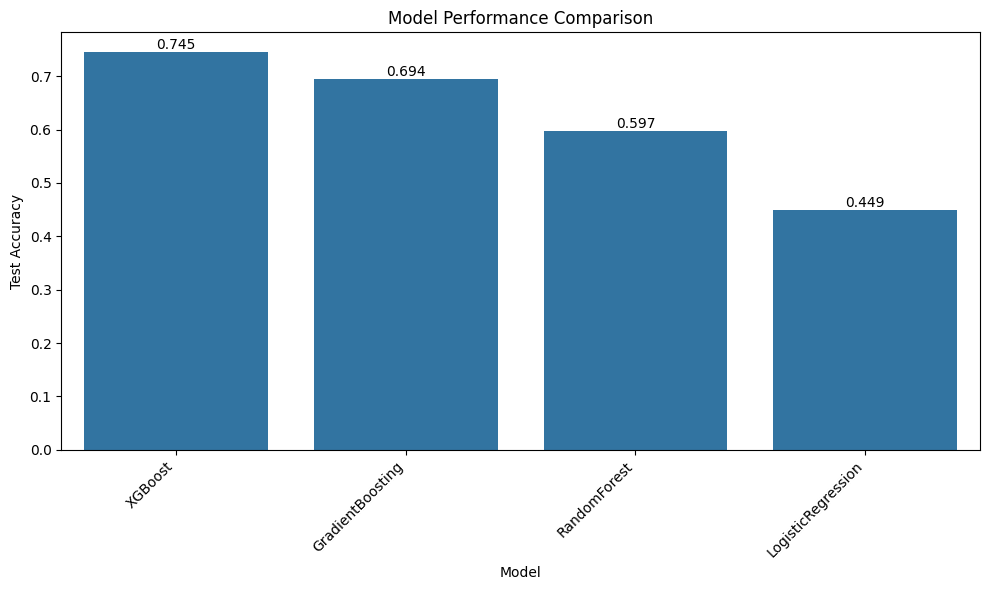

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Model', y='Test_Acc', data=results_df)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

=== LogisticRegression ===
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        28
           1       0.43      0.50      0.46         6
           2       0.42      0.56      0.48         9
           3       0.50      0.54      0.52        13
           4       0.50      0.33      0.40         3
           5       0.40      0.33      0.36         6
           6       0.43      0.35      0.39        17
           7       0.00      0.00      0.00         1
           8       0.46      0.46      0.46        26
           9       0.00      0.00      0.00         5
          10       0.43      0.52      0.47        29
          11       0.00      0.00      0.00         2
          12       0.33      0.20      0.25         5
          13       0.46      0.50      0.48        22
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.41      0.61      0.49        23


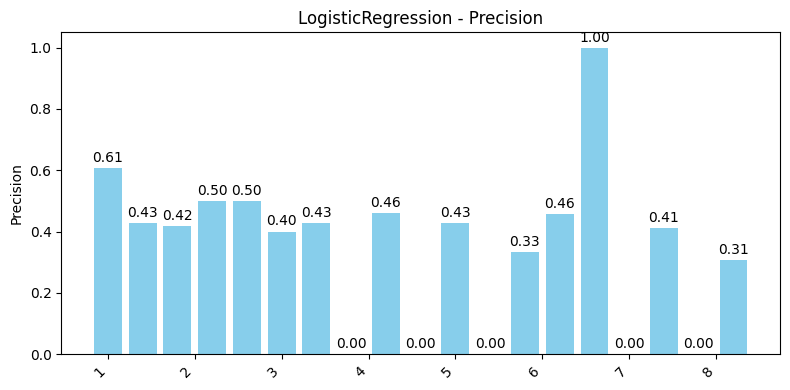

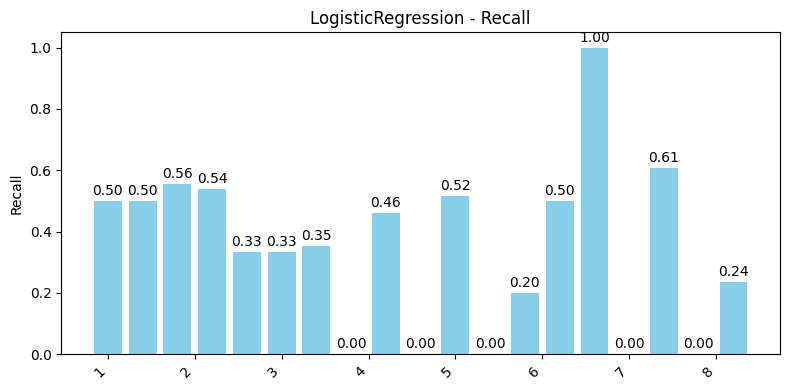

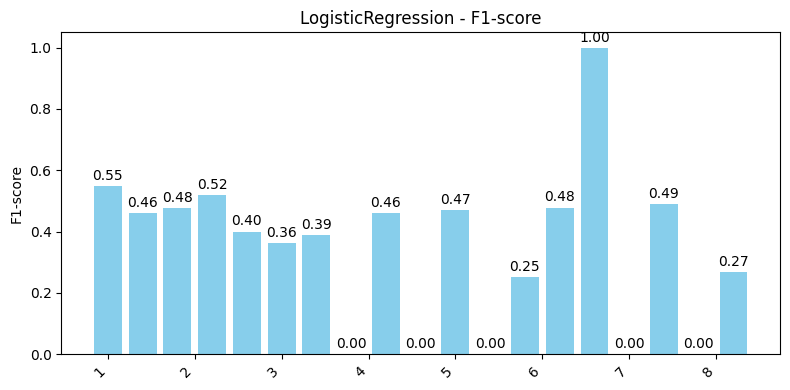

=== RandomForest ===
              precision    recall  f1-score   support

           0       0.66      0.75      0.70        28
           1       0.44      0.67      0.53         6
           2       0.57      0.44      0.50         9
           3       0.57      0.62      0.59        13
           4       1.00      0.67      0.80         3
           5       0.71      0.83      0.77         6
           6       0.56      0.29      0.38        17
           7       0.00      0.00      0.00         1
           8       0.61      0.65      0.63        26
           9       0.25      0.20      0.22         5
          10       0.53      0.66      0.58        29
          11       0.00      0.00      0.00         2
          12       0.75      0.60      0.67         5
          13       0.61      0.64      0.62        22
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.60      0.65      0.62        23
      

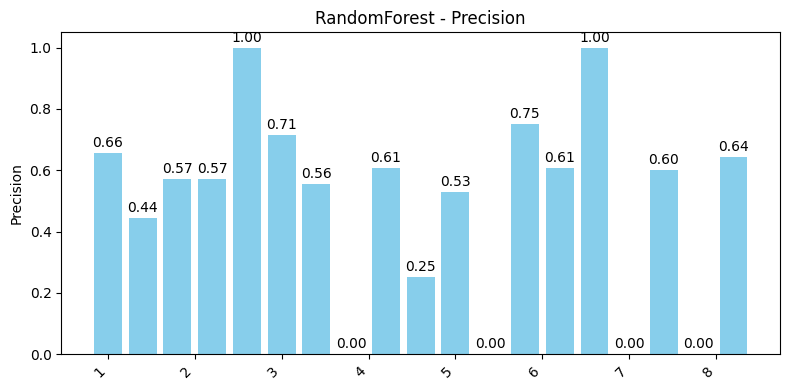

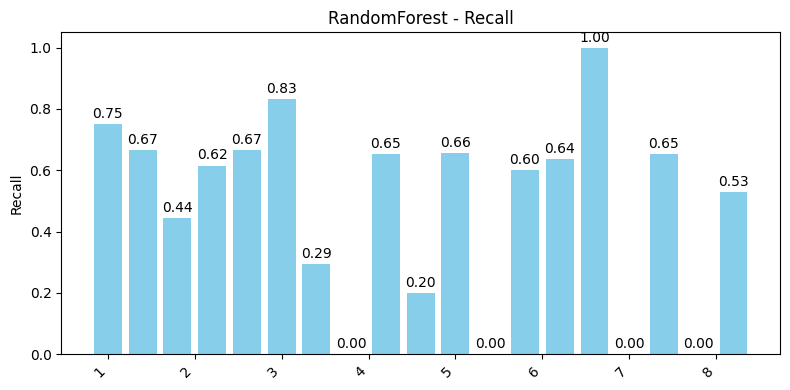

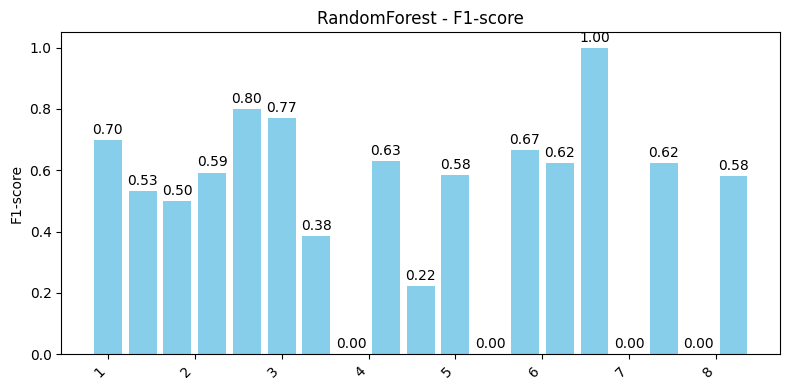

=== GradientBoosting ===
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.50      0.67      0.57         6
           2       0.57      0.44      0.50         9
           3       0.56      0.69      0.62        13
           4       0.67      0.67      0.67         3
           5       0.75      1.00      0.86         6
           6       0.78      0.41      0.54        17
           7       1.00      1.00      1.00         1
           8       0.75      0.81      0.78        26
           9       0.50      0.60      0.55         5
          10       0.67      0.83      0.74        29
          11       0.50      0.50      0.50         2
          12       1.00      0.80      0.89         5
          13       0.70      0.64      0.67        22
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.65      0.65      0.65        23
  

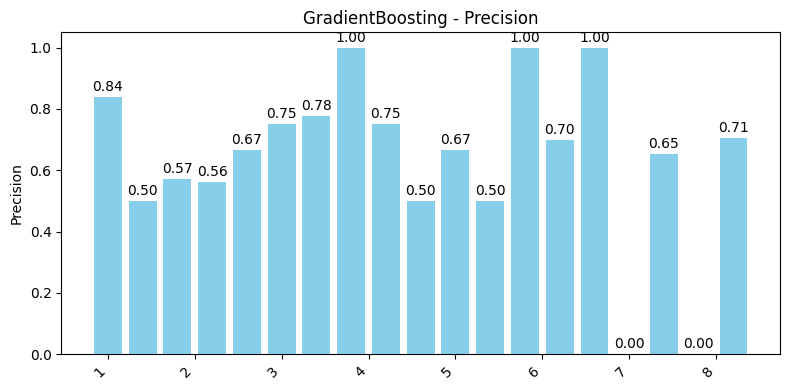

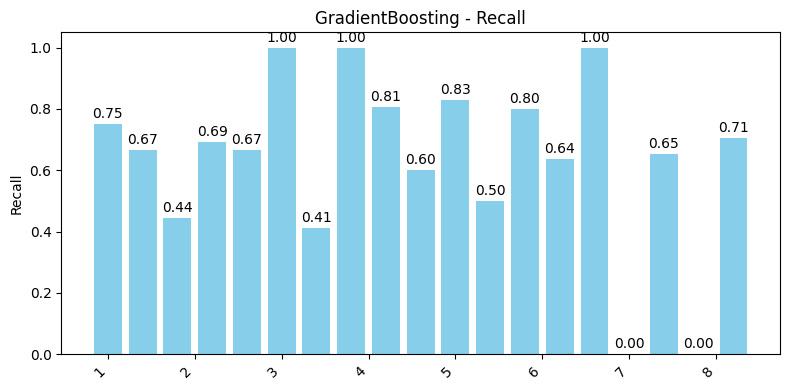

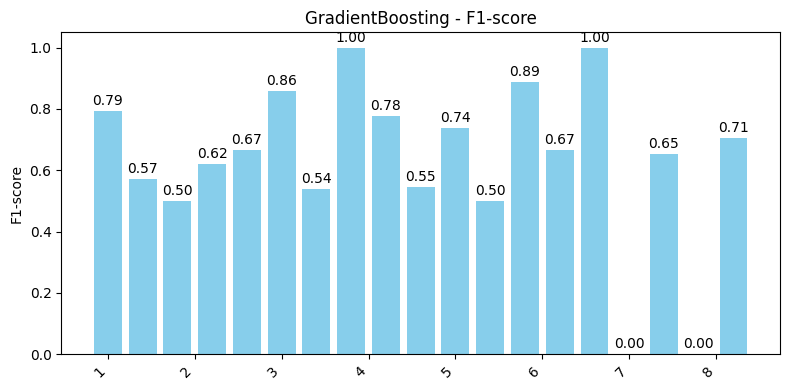

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.50      0.67      0.57         6
           2       0.80      0.44      0.57         9
           3       0.67      0.62      0.64        13
           4       1.00      0.67      0.80         3
           5       0.71      0.83      0.77         6
           6       0.75      0.53      0.62        17
           7       0.50      1.00      0.67         1
           8       0.76      0.85      0.80        26
           9       0.50      0.40      0.44         5
          10       0.71      0.93      0.81        29
          11       1.00      0.50      0.67         2
          12       1.00      0.80      0.89         5
          13       0.83      0.68      0.75        22
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       0.68      0.74      0.71        23
          1

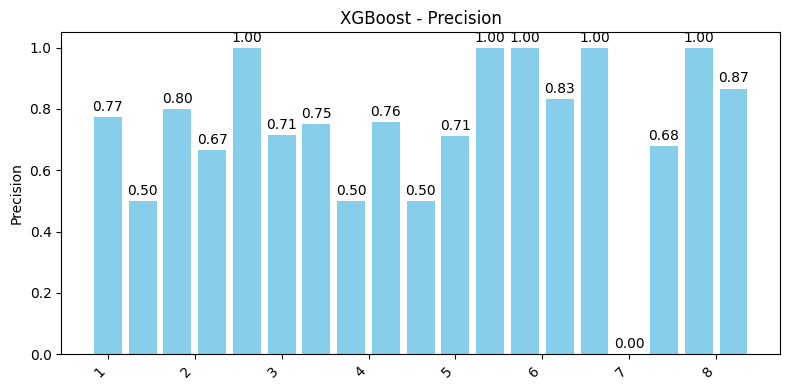

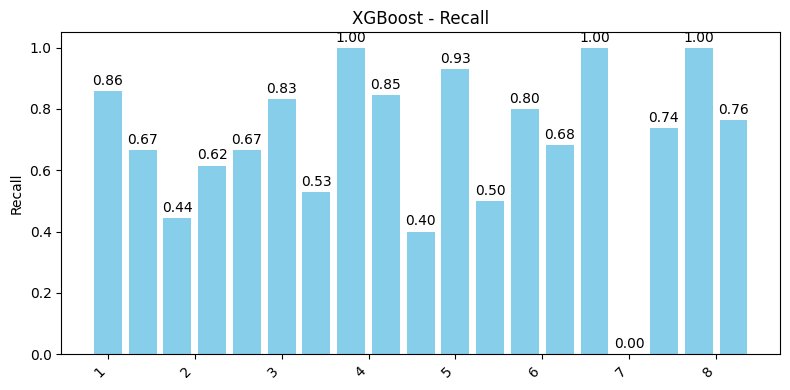

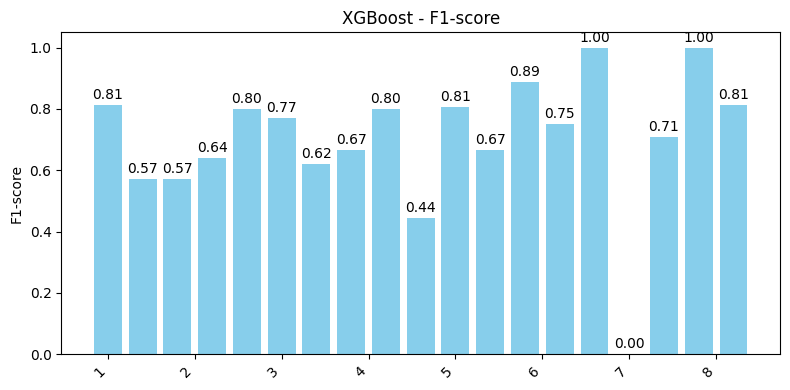

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support # Importing the classification_report and precision_recall_fscore_support functions
for name, model in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"=== {name} ===")
    le = LabelEncoder()
    le.fit(y_train) # Fit on y_train
    # Use the fitted LabelEncoder to transform y_train and y_test
    y_train = le.transform(y_train)
    y_test = le.transform(y_test)
    report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)

    # --- Plotting ---
    class_labels = le.classes_  # Get labels (team names) from LabelEncoder
    metrics = ['precision', 'recall', 'f1-score']

    for metric in metrics:
        metric_values = [report_dict[str(label)][metric] for label in range(len(class_labels))]

        fig, ax = plt.subplots(figsize=(8, 4))  # Create a separate figure for each metric
        ax.bar(class_labels, metric_values, color='skyblue')  # Single color for better clarity

        ax.set_ylabel(metric.capitalize())
        ax.set_title(f'{name} - {metric.capitalize()}')
        ax.set_xticklabels(class_labels, rotation=45, ha='right')

        for i, v in enumerate(metric_values):
            ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black')  # Add values on bars

        plt.tight_layout()
        plt.show()

    # Store results (same as before)
    results.append({
        'Model': name,
        'precision': precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)[0],
        'recall': precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)[1],
        'f1-score': precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)[2]
    })

=== Model Performance ===
             Model  CV_Acc  Test_Acc
           XGBoost   0.660     0.745
  GradientBoosting   0.651     0.694
      RandomForest   0.559     0.597
LogisticRegression   0.460     0.449


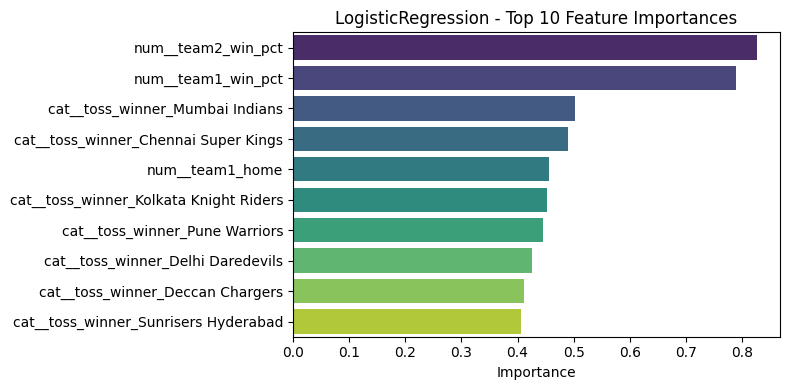

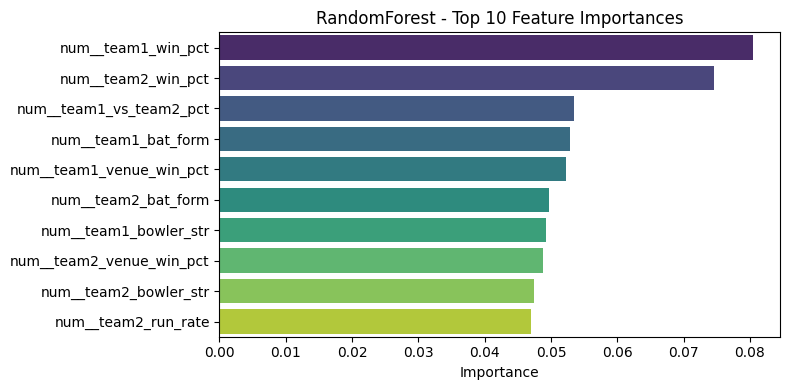

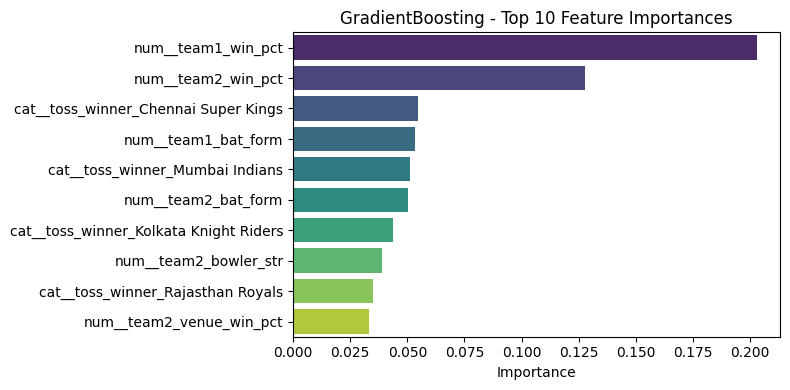

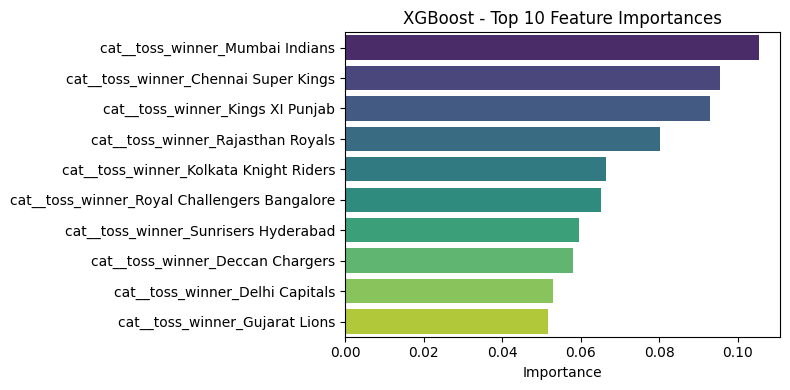

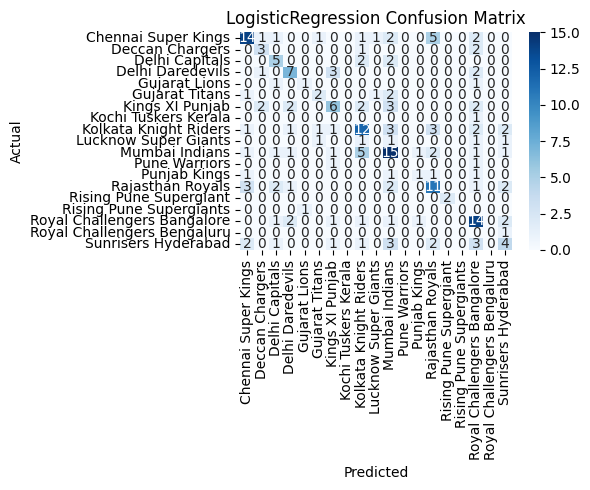

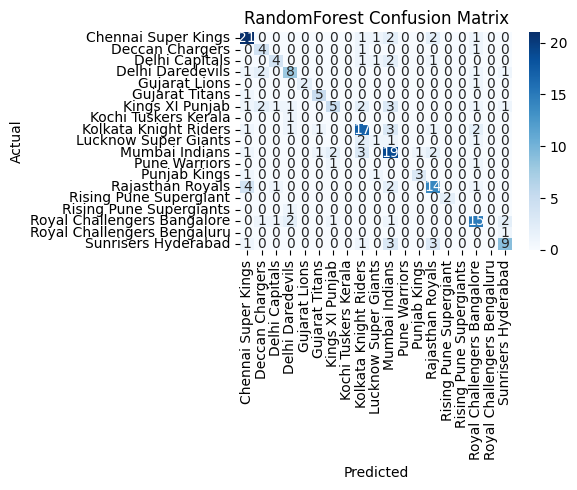

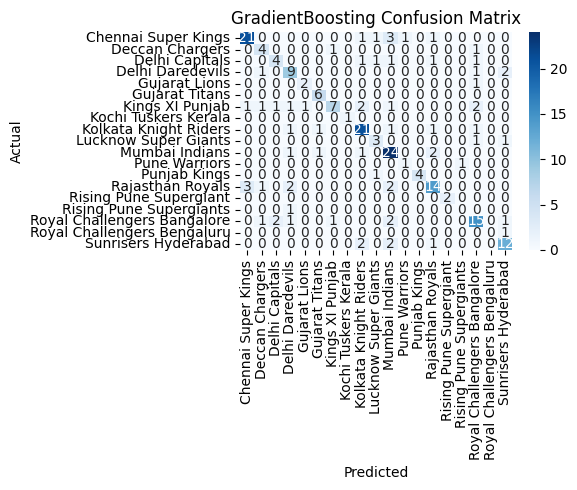

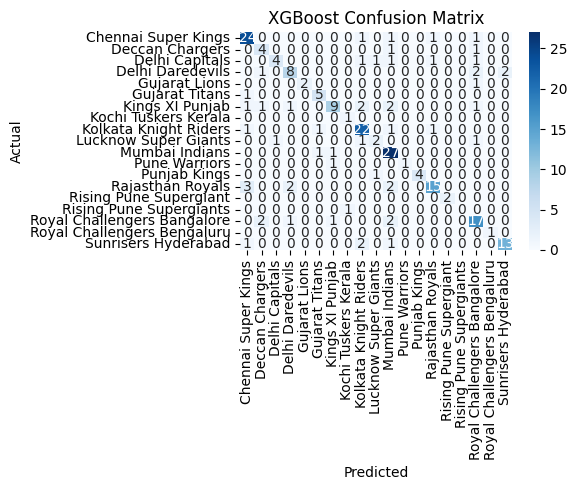

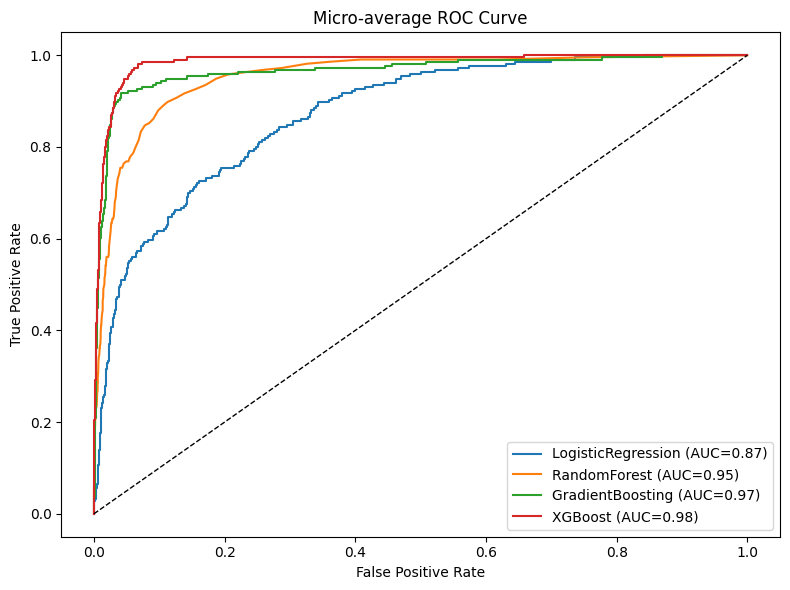

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load datasets
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

# 2. Filter valid matches
matches = matches[(matches.super_over=='N') & (matches.result!='no result')].copy()
valid_ids = matches.id
deliveries = deliveries[deliveries.match_id.isin(valid_ids)]

# 3. Compute match-level batting/bowling stats
agg = deliveries.groupby(['match_id','inning']).agg(
    runs=('batsman_runs','sum'),
    balls=('ball','count')
).reset_index()
agg['run_rate'] = agg.runs/(agg.balls/6)
pivot = agg.pivot(index='match_id', columns='inning', values=['runs','run_rate'])
pivot.columns = [f'{stat}_{inn}' for stat,inn in pivot.columns]
stats = pivot.reset_index().rename(columns={
    'runs_1':'team1_runs','runs_2':'team2_runs',
    'run_rate_1':'team1_run_rate','run_rate_2':'team2_run_rate'
})
stats['team1_econ'] = stats.team2_runs/(stats.team2_run_rate)
stats['team2_econ'] = stats.team1_runs/(stats.team1_run_rate)

# 4. Build match-level DataFrame
md = matches[['id','team1','team2','toss_winner','toss_decision','venue','city','winner','player_of_match']].copy()
md.rename(columns={'id':'match_id'}, inplace=True)
md = md.merge(stats, on='match_id', how='left')

# 5. Historical win percentages
win_counts = md.winner.value_counts()
match_counts = pd.concat([md.team1, md.team2]).value_counts()
win_pct = (win_counts/match_counts).fillna(0)
md['team1_win_pct'] = md.team1.map(win_pct)
md['team2_win_pct'] = md.team2.map(win_pct)

# 6. Venue win percentages
venue_wins = md.groupby(['venue','winner']).size().unstack(fill_value=0)
venue_matches = md.groupby('venue').size()
venue_win_pct = venue_wins.div(venue_matches, axis=0).fillna(0)
md['team1_venue_win_pct'] = md.apply(lambda r: venue_win_pct.at[r['venue'], r['team1']], axis=1)
md['team2_venue_win_pct'] = md.apply(lambda r: venue_win_pct.at[r['venue'], r['team2']], axis=1)

# 7. Head-to-head percentages
hh_wins = pd.crosstab(md.team1, md.team2, md.winner,
                     aggfunc=lambda x: (x==md.loc[x.index,'team1']).sum()).fillna(0)
hh_matches = pd.crosstab(md.team1, md.team2).fillna(0)
hh_pct = (hh_wins/hh_matches).fillna(0)
md['team1_vs_team2_pct'] = md.apply(lambda r: hh_pct.at[r['team1'], r['team2']], axis=1)

# 8. Top-player proxy
top_players = md.player_of_match.value_counts().index[:20]
md['team1_top_player'] = md.team1.isin(top_players).astype(int)
md['team2_top_player'] = md.team2.isin(top_players).astype(int)

# 9. Home-ground feature
home_map = {
    'Chennai Super Kings':'Chennai','Delhi Capitals':'Delhi','Delhi Daredevils':'Delhi',
    'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata',
    'Royal Challengers Bangalore':'Bangalore','Royal Challengers Bengaluru':'Bangalore',
    'Rajasthan Royals':'Jaipur','Kings XI Punjab':'Mohali','Punjab Kings':'Mohali',
    'Sunrisers Hyderabad':'Hyderabad','Deccan Chargers':'Hyderabad','Pune Warriors':'Pune',
    'Gujarat Lions':'Rajkot','Rising Pune Supergiant':'Pune','Rising Pune Supergiants':'Pune',
    'Kochi Tuskers Kerala':'Kochi','Gujarat Titans':'Rajkot','Lucknow Super Giants':'Lucknow'
}
md['team1_home'] = (md.team1.map(home_map)==md.city).astype(int)
md['team2_home'] = (md.team2.map(home_map)==md.city).astype(int)

# 10. Bowler strength
bs = deliveries.groupby(['match_id','bowling_team','bowler']).agg(
    runs_conceded=('total_runs','sum'),
    balls=('ball','count')
).reset_index()
bs['econ'] = bs.runs_conceded/(bs.balls/6)
team_bs = bs.groupby(['match_id','bowling_team']).apply(
    lambda df: df.nlargest(3,'balls').econ.mean()
).reset_index(name='bowler_strength')
pivot_bs = team_bs.pivot(index='match_id', columns='bowling_team', values='bowler_strength')
md['team1_bowler_str'] = md.apply(lambda r: pivot_bs.at[r.match_id, r.team1], axis=1)
md['team2_bowler_str'] = md.apply(lambda r: pivot_bs.at[r.match_id, r.team2], axis=1)

# 11. Batsman form
bats = deliveries.groupby(['match_id','batting_team','batter']).agg(
    runs_scored=('batsman_runs','sum')
).reset_index()
team_bat = bats.groupby(['match_id','batting_team']).apply(
    lambda df: df.nlargest(5,'runs_scored').runs_scored.mean()
).reset_index(name='batsman_form')
pivot_bat = team_bat.pivot(index='match_id', columns='batting_team', values='batsman_form')
md['team1_bat_form'] = md.apply(lambda r: pivot_bat.at[r.match_id, r.team1], axis=1)
md['team2_bat_form'] = md.apply(lambda r: pivot_bat.at[r.match_id, r.team2], axis=1)

md.fillna(0, inplace=True)

# 12. Prepare features & target
features = [
    'toss_winner','toss_decision',
    'team1_runs','team2_runs','team1_run_rate','team2_run_rate',
    'team1_econ','team2_econ','team1_win_pct','team2_win_pct',
    'team1_venue_win_pct','team2_venue_win_pct','team1_vs_team2_pct',
    'team1_top_player','team2_top_player','team1_home','team2_home',
    'team1_bowler_str','team2_bowler_str','team1_bat_form','team2_bat_form'
]
X = md[features]
le = LabelEncoder()
y = le.fit_transform(md.winner)

# 13. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 14. Preprocessing pipeline
categorical = ['toss_winner','toss_decision']
numeric = [c for c in features if c not in categorical]
pre = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)
])

# 15. Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                              n_estimators=200, learning_rate=0.05, random_state=42)
}

# 16. Train & evaluate
fitted_pipes = {}
results = []
for name, m in models.items():
    pipe = Pipeline([('pre', pre), ('clf', m)])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='accuracy')
    pipe.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    results.append({'Model':name,
                    'CV_Acc':round(cv_scores.mean(),3),
                    'Test_Acc':round(test_acc,3)})
    fitted_pipes[name] = pipe

results_df = pd.DataFrame(results).sort_values('Test_Acc', ascending=False)

# 17. Performance Table
print("=== Model Performance ===")
print(results_df.to_string(index=False))

# 18. Feature Importances
for name, pipe in fitted_pipes.items():
    m = pipe.named_steps['clf']
    fn = pipe.named_steps['pre'].get_feature_names_out()
    if hasattr(m, 'feature_importances_'):
        imp = m.feature_importances_
    else:
        imp = np.mean(np.abs(m.coef_), axis=0)
    idx = np.argsort(imp)[::-1][:10]
    plt.figure(figsize=(8,4))
    sns.barplot(x=imp[idx], y=fn[idx], palette='viridis')
    plt.title(f'{name} - Top 10 Feature Importances')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# 19. Confusion Matrices
classes = le.inverse_transform(np.arange(len(le.classes_)))
for name, pipe in fitted_pipes.items():
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# 20. ROC Curves (micro-average)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
plt.figure(figsize=(8,6))
for name, pipe in fitted_pipes.items():
    clf = pipe.named_steps['clf']
    if hasattr(clf, 'predict_proba'):
        y_score = pipe.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', lw=1)
plt.title('Micro-average ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()
